# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Victoria!👏🚀

O seu trabalho demonstra alta qualidade, com código bem estruturado e comentários relevantes em cada etapa. Fiz algumas sugestões que podem contribuir para elevar ainda mais a qualidade do projeto.

Continue com o excelente trabalho!

</div>

In [62]:
## Analysis Game 

In [63]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import math as mt
import plotly.express as px
from datetime import datetime

In [64]:
### 1. Leitura

In [65]:
df_project_6 = pd.read_csv('/datasets/games.csv')

In [66]:
df_project_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [67]:
#converter year_of_release para datetime
#Ajustar nomes 
# Verificar repetidos e nulos
#Tratar repetidos e nulos


In [68]:
df_project_6.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [69]:
print (df_project_6.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [70]:
new_name_columns = []
for old_name in df_project_6.columns:
    name_lower = old_name.lower()
    new_name_columns.append(name_lower)
df_project_6.columns = new_name_columns
print (df_project_6.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [74]:
print (df_project_6.isna().sum())

name                  0
platform              0
year_of_release     175
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1915
user_score            0
rating              136
dtype: int64


In [75]:
df_project_6 = df_project_6.dropna(subset=['year_of_release'])

In [130]:
df_project_6.loc[:,'year_of_release'] = df_project_6['year_of_release'].astype('int')

In [77]:
df_project_6['year_of_release'].head(20)

0     2006
2     2008
3     2009
6     2006
7     2006
8     2009
11    2005
13    2007
14    2010
15    2009
16    2013
17    2004
19    2005
23    2013
24    2002
26    2005
28    2001
29    2011
32    2010
34    2012
Name: year_of_release, dtype: int64

In [131]:
df_project_6.loc[:,'user_score'] = pd.to_numeric(df_project_6['user_score'], errors='coerce')

In [79]:
total_sale = df_project_6.groupby('name')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
total_sale['total_sale'] = total_sale[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
total_sale = total_sale.drop(columns=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

df_project_6 = df_project_6.merge(total_sale, on='name', how='left')

print(df_project_6)
                                  

                               name platform  year_of_release       genre  \
0                        Wii Sports      Wii             2006      Sports   
1                    Mario Kart Wii      Wii             2008      Racing   
2                 Wii Sports Resort      Wii             2009      Sports   
3             New Super Mario Bros.       DS             2006    Platform   
4                          Wii Play      Wii             2006        Misc   
...                             ...      ...              ...         ...   
9834               Mega Brain Boost       DS             2008      Puzzle   
9835        STORM: Frontline Nation       PC             2011    Strategy   
9836                       Plushees       DS             2008  Simulation   
9837                        15 Days       PC             2009   Adventure   
9838  Men in Black II: Alien Escape       GC             2003     Shooter   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Processamento dos dados realizado com sucesso.
A coluna year_of_release também poderia ter sido processada da seguinte maneira: 
```python
# Preenche os valores nulos na coluna 'year_of_release' com o valor mínimo do grupo formado por 'name' e 'platform'
df['year_of_release'] = df.groupby(['name', 'platform'])['year_of_release'].transform(lambda x: x.fillna(x.min()))

# Preenche os valores nulos na coluna 'year_of_release' com o valor mínimo do grupo formado por 'name'
df['year_of_release'] = df.groupby(['name'])['year_of_release'].transform(lambda x: x.fillna(x.min()))

# Preenche os valores nulos na coluna 'year_of_release' com o valor mínimo do grupo formado por 'platform'
df['year_of_release'] = df.groupby(['platform'])['year_of_release'].transform(lambda x: x.fillna(x.min()))

    
```

</div>

In [80]:
###Analise dos dados

    year_of_release  total_year
0              1985           1
1              1988           1
2              1992           1
3              1994           1
4              1996           8
5              1997          19
6              1998          31
7              1999          39
8              2000         150
9              2001         339
10             2002         656
11             2003         611
12             2004         596
13             2005         704
14             2006         676
15             2007         821
16             2008         987
17             2009        1019
18             2010         798
19             2011         718
20             2012         363
21             2013         319
22             2014         350
23             2015         335
24             2016         296


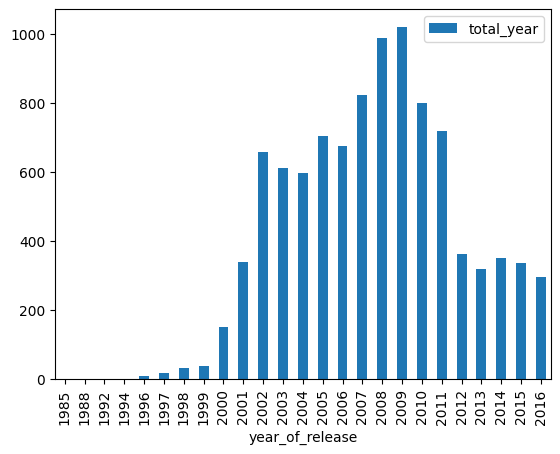

In [81]:
total_year = df_project_6.groupby(by='year_of_release')['name'].count().reset_index()
total_year = total_year.rename(columns={'name': 'total_year'})

print(total_year)

total_year.plot(x = 'year_of_release', y = 'total_year', kind='bar')
plt.show()

In [82]:
##Dados entre os anos 1980 até 1993 não são significativos, a quantidade de jogos era baixa.


In [83]:
total_platform = df_project_6.groupby('platform')['total_sale'].sum().reset_index()
total_platform = total_platform.sort_values(by='total_sale', ascending=False)
print(total_platform)

   platform  total_sale
14     X360     2351.81
8       PS3     2204.22
7       PS2     1785.78
5        PC     1595.10
12      Wii     1499.89
2        DS     1123.34
15       XB      849.54
4        GC      703.95
10      PSP      703.46
9       PS4      584.68
16     XOne      569.40
3       GBA      490.46
13     WiiU      289.18
0       3DS      280.70
6        PS      268.23
11      PSV      171.54
1        DC        5.15


In [ ]:
total_year = df_project_6['platform'].value_counts().sort_index()
total_year = total_year.sort_values()
total_year.plot(kind='bar')

In [84]:
filtered_df = df_project_6[df_project_6['year_of_release'] >= 2013]
filtered_df = filtered_df[filtered_df['year_of_release'] <= 2017]

total_year_sale = filtered_df.groupby(['platform', 'year_of_release']).size().reset_index(name='total_sales')

print(total_year_sale)

   platform  year_of_release  total_sales
0       3DS             2013           29
1       3DS             2014           31
2       3DS             2015           30
3       3DS             2016           15
4        DS             2013            6
5        PC             2013           33
6        PC             2014           39
7        PC             2015           41
8        PC             2016           47
9       PS3             2013           89
10      PS3             2014           68
11      PS3             2015           37
12      PS3             2016           15
13      PS4             2013           15
14      PS4             2014           52
15      PS4             2015           90
16      PS4             2016          106
17      PSP             2013            2
18      PSV             2013           26
19      PSV             2014           37
20      PSV             2015           29
21      PSV             2016           14
22      Wii             2013      

<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>

Bom trabalho em selecionar o período de 2013 - 2017. O período de 2-3 anos é ideal  parao prever as vendas do próximo ano, mesmo no caso de negócios tradicionais. E na indústria dinâmica de jogos de computador, evitar intervalos de tempo mais longos é aconselhável, pois isso certamente levará ao rastreamento de tendências obsoletas. 
Sobre a maneira que você filtrou o período temporal, Você pode otimizar seu código combinando as condições em uma única linha usando o método between. Aqui está a versão otimizada: 
```python
filtered_df = df_project_6[df_project_6['year_of_release'].between(2013, 2017)]

```
</div>

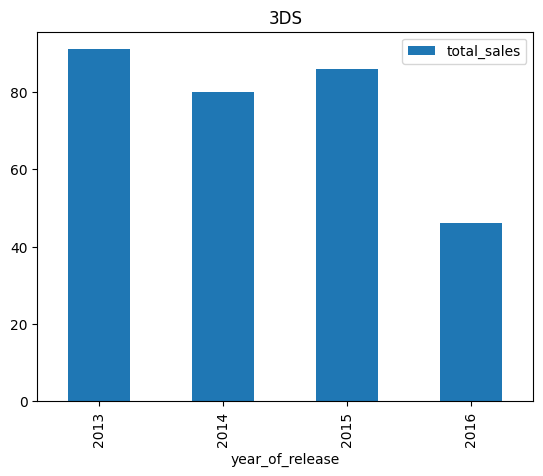

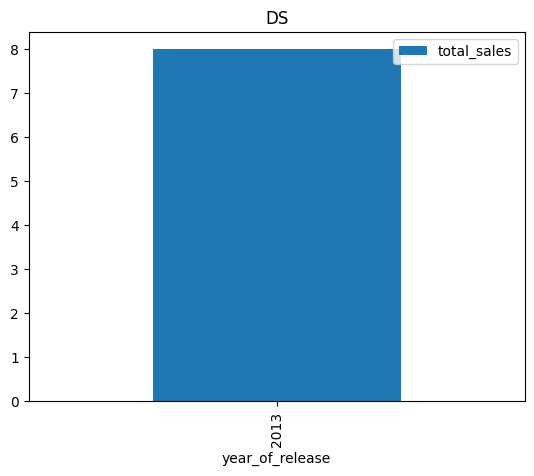

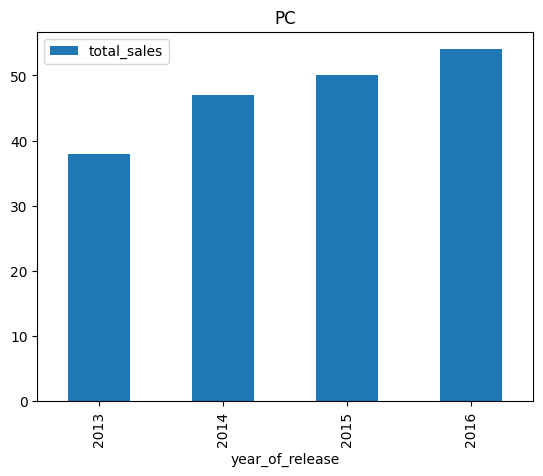

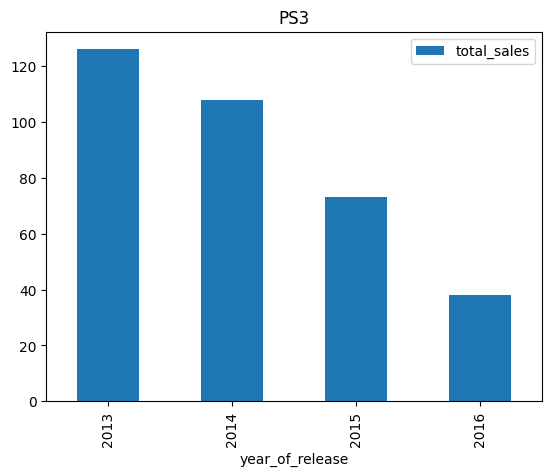

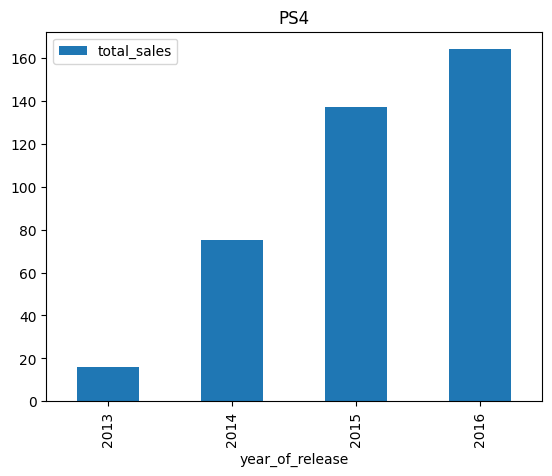

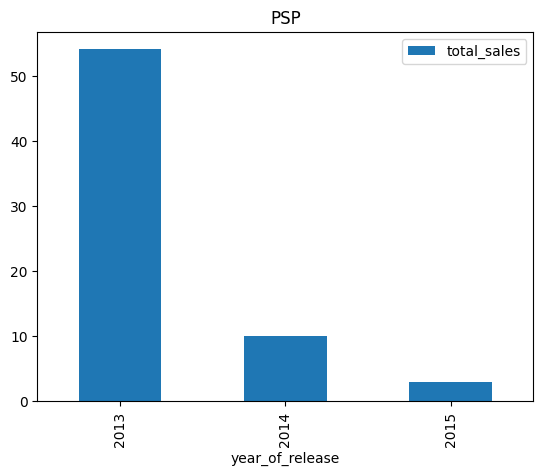

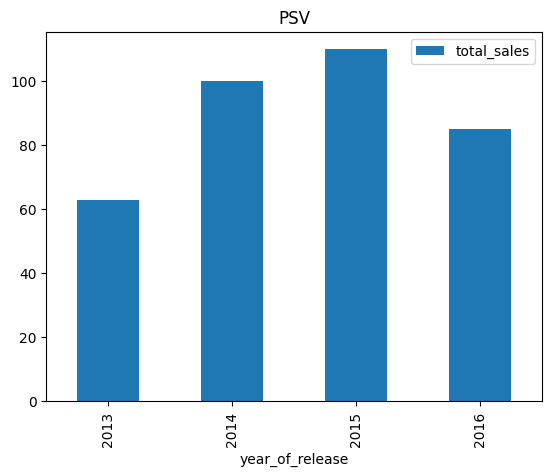

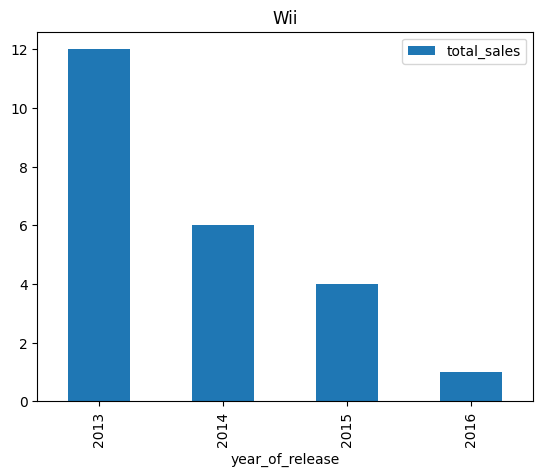

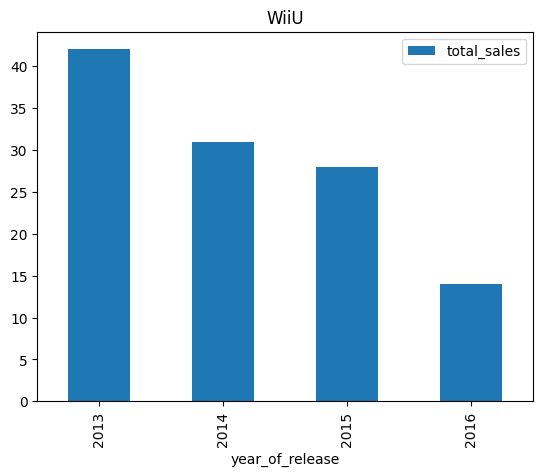

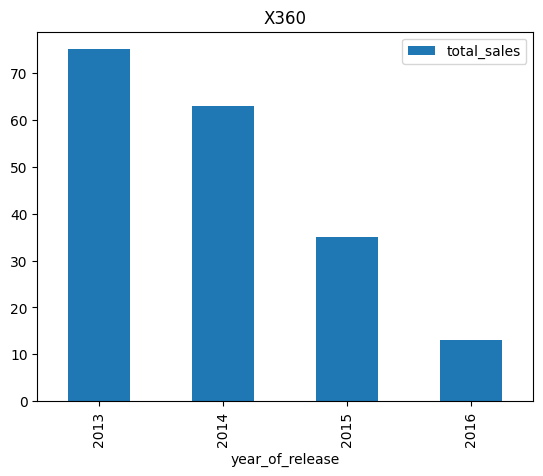

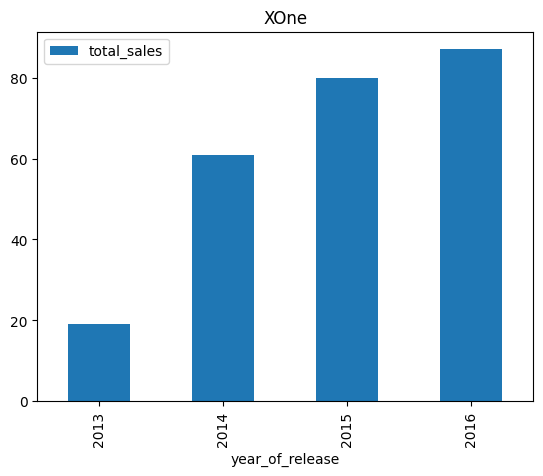

In [44]:
for platform in total_year_sale['platform'].unique():
    platform_data = total_year_sale[total_year_sale['platform'] == platform]
    platform_data.plot(x='year_of_release', y='total_sales', kind='bar')
    plt.title(platform)
    plt.show()

<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>

Para demonstrar dados temporais das plataformas dos jogos, seria melhor criar um gráfico semelhante a esse: 
    
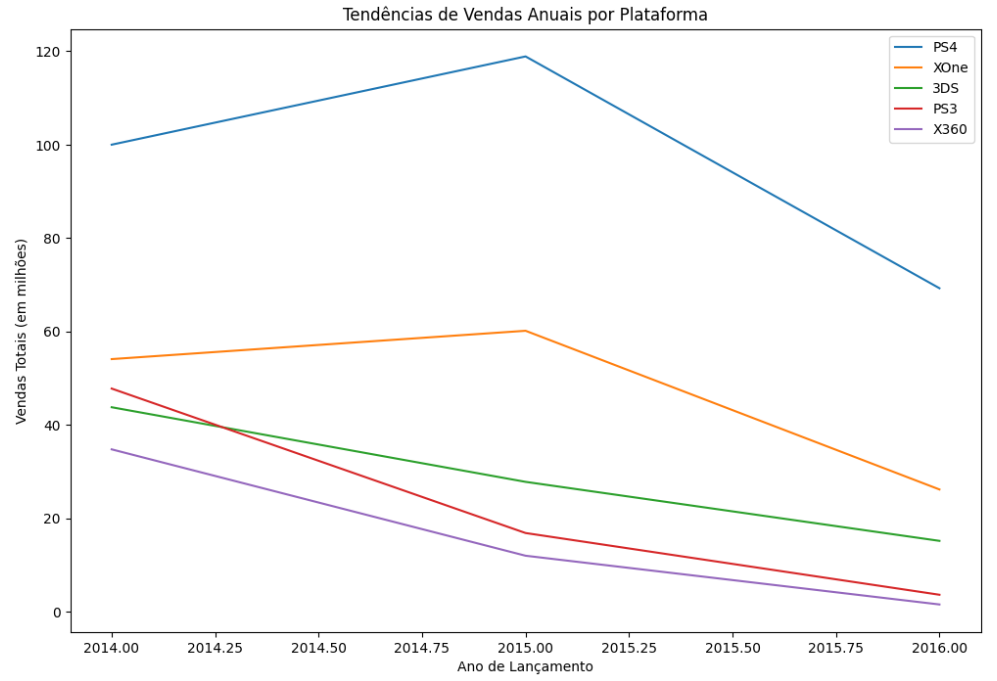    
</div>

In [85]:
total_year_sale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   platform         38 non-null     object
 1   year_of_release  38 non-null     int64 
 2   total_sales      38 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ KB


In [86]:
mean_sale = total_year_sale.groupby('platform')['total_sales'].mean().reset_index()
print(mean_sale)

   platform  total_sales
0       3DS        26.25
1        DS         6.00
2        PC        40.00
3       PS3        52.25
4       PS4        65.75
5       PSP         2.00
6       PSV        26.50
7       Wii         4.50
8      WiiU        21.25
9      X360        38.25
10     XOne        48.25


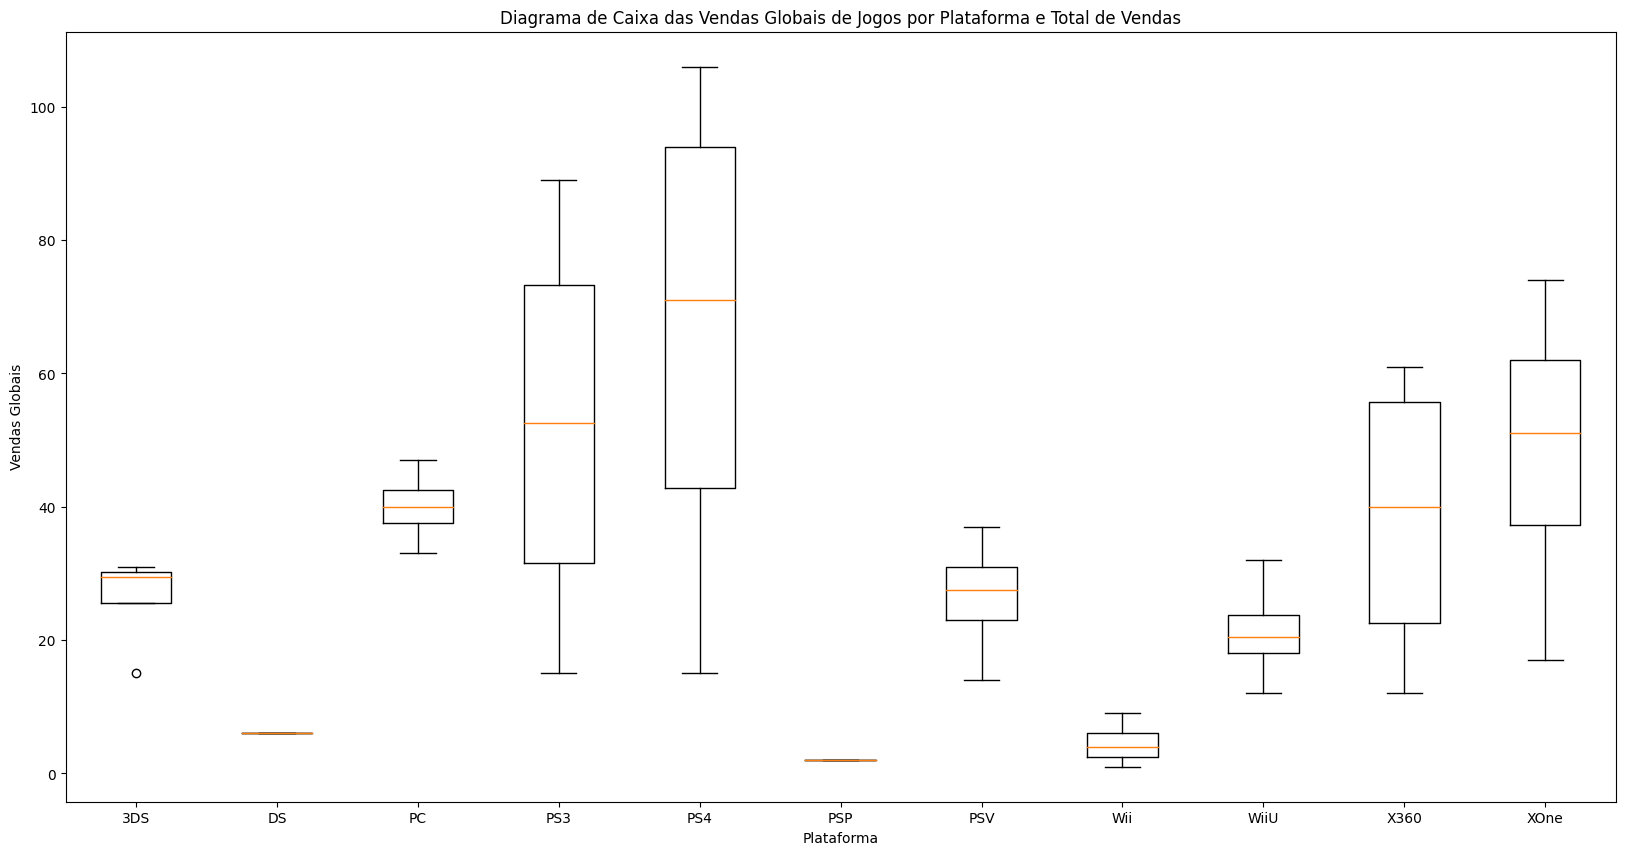

In [87]:
box_sale = total_year_sale.groupby(['platform', 'total_sales']).mean().reset_index()

data_dict = {}

for platform, group in box_sale.groupby('platform'):
    data_dict[platform] = group['total_sales']

plt.figure(figsize=(20, 10))
plt.boxplot(data_dict.values(), labels=data_dict.keys())
plt.title('Diagrama de Caixa das Vendas Globais de Jogos por Plataforma e Total de Vendas')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais')

plt.show()

In [88]:
duration_df = df_project_6.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

duration_df['duration'] = duration_df['max'] - duration_df['min']
print(duration_df)

   platform   min   max  duration
0       3DS  2011  2016         5
1        DC  1999  2001         2
2        DS  2004  2013         9
3       GBA  2001  2007         6
4        GC  2001  2007         6
5        PC  1985  2016        31
6        PS  1994  2002         8
7       PS2  2000  2011        11
8       PS3  2006  2016        10
9       PS4  2013  2016         3
10      PSP  2004  2013         9
11      PSV  2011  2016         5
12      Wii  2006  2016        10
13     WiiU  2012  2016         4
14     X360  2005  2016        11
15       XB  2000  2008         8
16     XOne  2013  2016         3


In [89]:
mean_duration = duration_df[['duration', 'platform']].mean()
median_duration = duration_df[['duration', 'platform']].median()
print(mean_duration)
print(median_duration)

duration    8.294118
dtype: float64
duration    8.0
dtype: float64


In [90]:
# A média se apresenta de forma diferente da mediana, isso significa que em existem plataformas que duram mais do que outras.

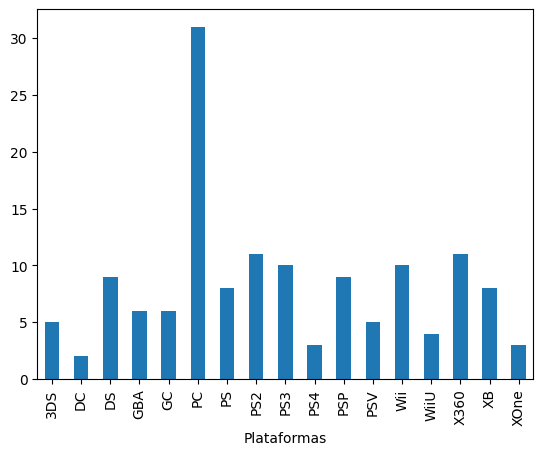

In [91]:
plot_duration = duration_df['duration'].plot(x = 'platform', y = 'year_of_release', kind = 'bar', xlabel = 'Plataformas')
plot_duration.set_xticklabels(duration_df['platform'], rotation=90) 
plt.show()

In [92]:
sale_mean = total_year_sale.groupby('platform')['total_sales'].mean()

print(sale_mean)

sale_desvio = total_year_sale.groupby('platform')['total_sales'].std()

print(sale_desvio)

platform
3DS     26.25
DS       6.00
PC      40.00
PS3     52.25
PS4     65.75
PSP      2.00
PSV     26.50
Wii      4.50
WiiU    21.25
X360    38.25
XOne    48.25
Name: total_sales, dtype: float64
platform
3DS      7.544314
DS            NaN
PC       5.773503
PS3     32.755407
PS4     40.713429
PSP           NaN
PSV      9.539392
Wii      3.415650
WiiU     8.220908
X360    23.128266
XOne    24.171264
Name: total_sales, dtype: float64


In [ ]:
#As empresas com as maiores médias de vendas não são necessariamente aquelas que estão vendendo mais atualmente.
#Isso ocorre porque as novas plataformas de vendas estão experimentando um crescimento significativo, mesmo que tenham menos tempo de existência em comparação com outras empresas. Portanto, ao calcular a média de vendas ao longo de um período, é importante considerar que a maior média não indica necessariamente a empresa mais lucrativa no momento.

In [95]:
df_project_6.dropna(subset=['user_score'], inplace=True)
user_scores = df_project_6.groupby('user_score')['total_sale'].mean().reset_index()
print(user_scores)

    user_score  total_sale
0          0.0    0.720000
1          0.2    1.650000
2          0.3    0.365000
3          0.5    0.595000
4          0.6    0.580000
..         ...         ...
90         9.3    1.439677
91         9.4    1.629091
92         9.5    0.346000
93         9.6    0.365000
94         9.7    0.030000

[95 rows x 2 columns]


In [96]:
df_project_6['total_sale'].head()

0    82.54
1    35.52
2    32.77
3    29.80
4    28.91
Name: total_sale, dtype: float64

<Figure size 1800x600 with 0 Axes>

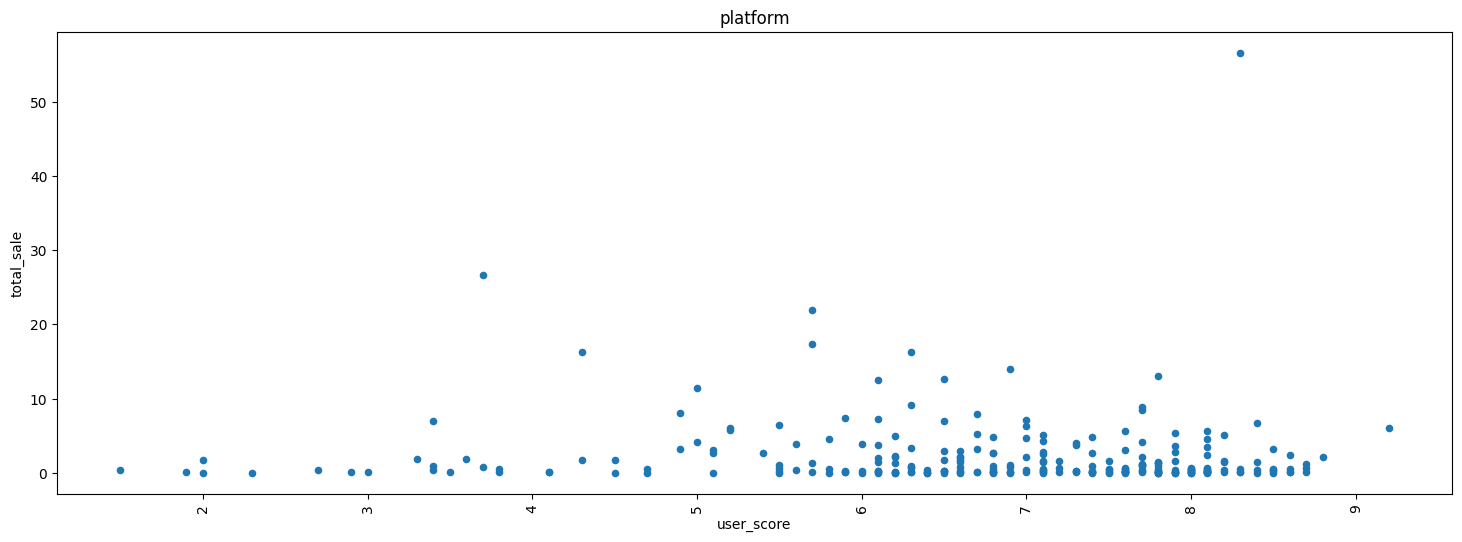

In [98]:
df_project_6.dropna(subset=['user_score'], inplace=True)

platform = 'PS4'
platform_user_ps4 = df_project_6[df_project_6['platform'] == platform]
platform_user_ps4 = platform_user_ps4.sort_values('user_score')
plt.figure(figsize=(18, 6))
platform_user_ps4.plot(x='user_score', y='total_sale', kind='scatter', figsize=(18, 6))
plt.xticks(rotation=90)
plt.title('platform')
plt.show()

<Figure size 1400x500 with 0 Axes>

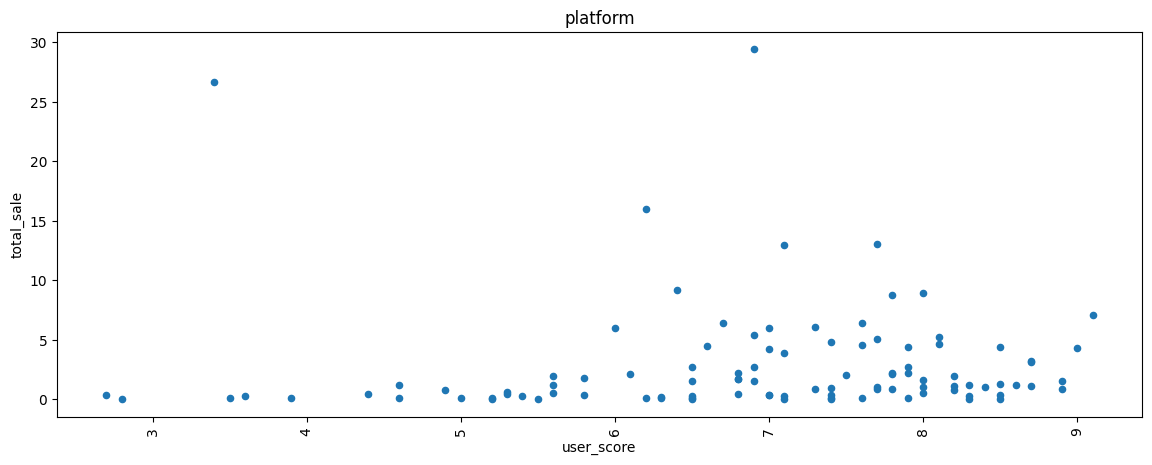

In [99]:
df_project_6.dropna(subset=['user_score'], inplace=True)

platform = 'WiiU'
platform_user_wiiu = df_project_6[df_project_6['platform'] == platform]
platform_user_wiiu = platform_user_wiiu.sort_values('user_score')
plt.figure(figsize=(14, 5))
platform_user_wiiu.plot(x='user_score', y='total_sale', kind='scatter', figsize=(14, 5))
plt.xticks(rotation=90)
plt.title('platform')
plt.show()

In [100]:
##As duas plataformas foram selecionadas anteriormente devido ao aumento nas vendas. Ao analisar o gráfico de dispersão, podemos observar que as avaliações têm uma influência significativa na quantidade de vendas. No entanto, é interessante notar que, a partir de uma determinada nota (acima de 6), o impacto das avaliações na quantidade de vendas é menor.
#Em outras palavras, avaliações positivas têm um impacto mais significativo nas vendas, mas após atingir um certo nível de satisfação, o efeito nas vendas diminui.


In [101]:
df_project_6.dropna(subset=['critic_score'], inplace=True)
critic_scores = df_project_6.groupby('critic_score')['total_sale'].mean().reset_index()
print(critic_scores)

    critic_score  total_sale
0           13.0    0.100000
1           17.0    0.260000
2           19.0    0.248333
3           20.0    1.140000
4           21.0    0.120000
..           ...         ...
76          94.0    6.993611
77          95.0    9.076875
78          96.0    9.402778
79          97.0   25.150000
80          98.0   12.735000

[81 rows x 2 columns]


<Figure size 1800x600 with 0 Axes>

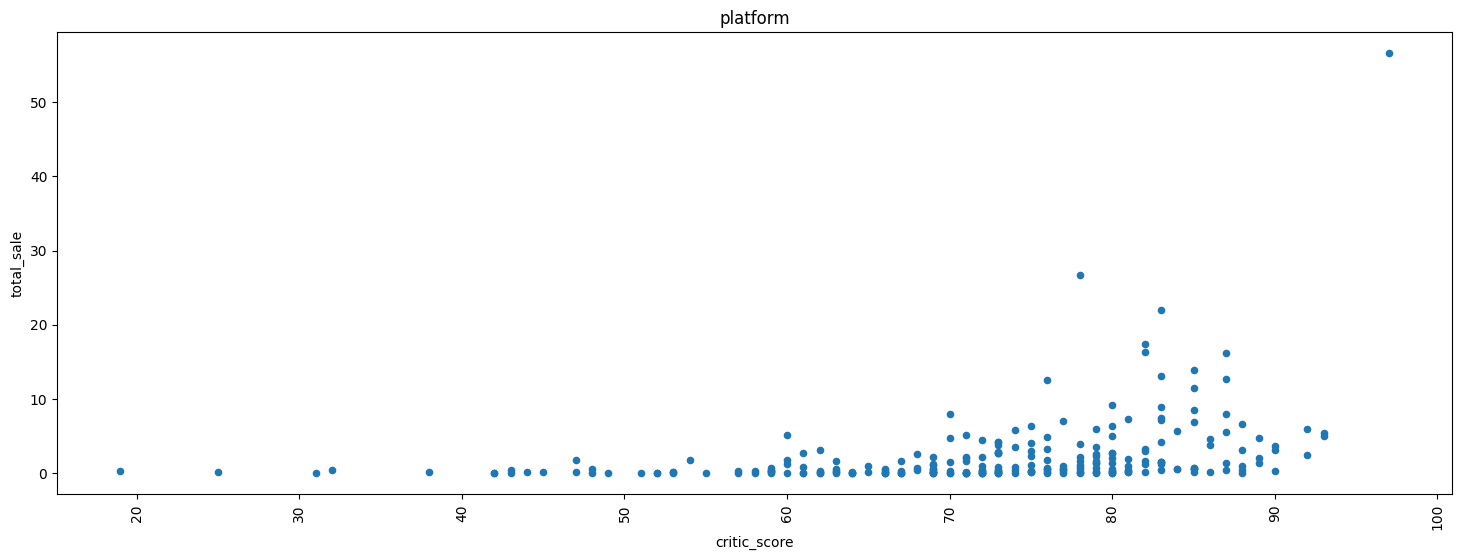

In [102]:
df_project_6.dropna(subset=['critic_score'], inplace=True)

platform = 'PS4'
platform_critic_ps4 = df_project_6[df_project_6['platform'] == platform]
platform_critic_ps4 = platform_critic_ps4.sort_values('critic_score')
plt.figure(figsize=(18, 6))
platform_critic_ps4.plot(x='critic_score', y='total_sale', kind='scatter', figsize=(18, 6))
plt.xticks(rotation=90)
plt.title('platform')
plt.show()

<Figure size 1800x600 with 0 Axes>

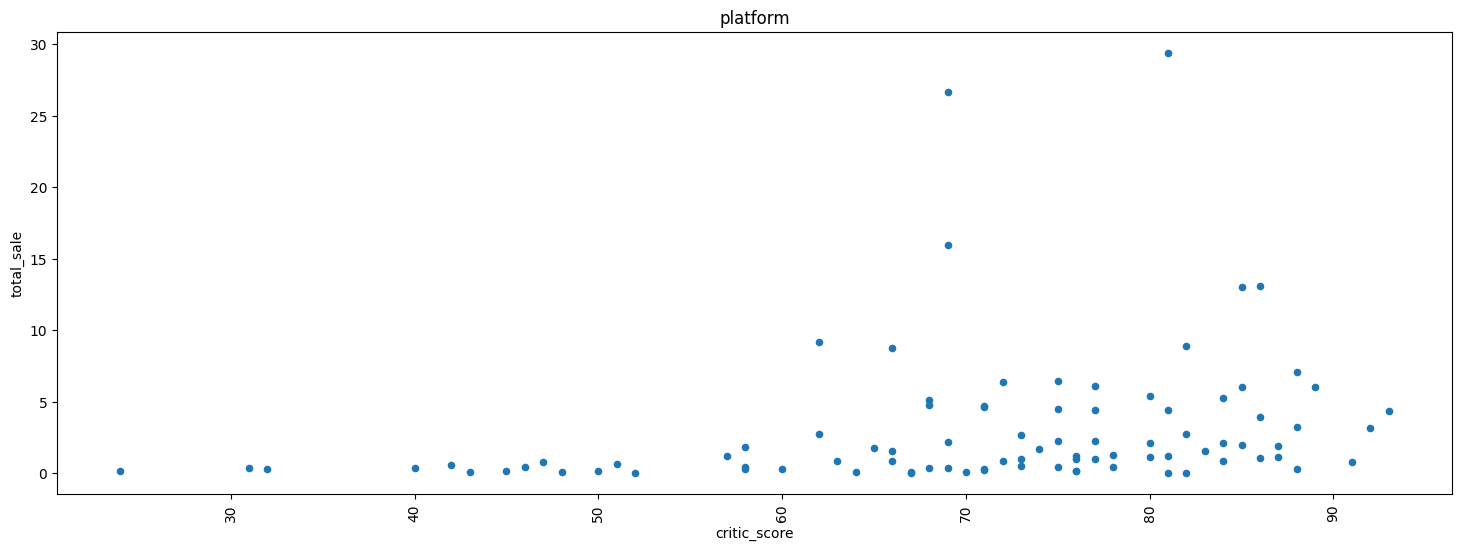

In [103]:
df_project_6.dropna(subset=['critic_score'], inplace=True)

platform = 'WiiU'
platform_critic_wiiu = df_project_6[df_project_6['platform'] == platform]
platform_critic_wiiu = platform_critic_wiiu.sort_values('critic_score')
plt.figure(figsize=(18, 6))
platform_critic_wiiu.plot(x='critic_score', y='total_sale', kind='scatter', figsize=(18, 6))
plt.xticks(rotation=90)
plt.title('platform')
plt.show()

In [ ]:
#As mesmas duas plataformas foram selecionadas novamente. 
#No que diz respeito às avaliações dos críticos, podemos observar uma correlação positiva com a quantidade de vendas. Em outras palavras, quanto maior a pontuação dada pelos críticos, maior é o número de vendas. 
#No entanto, também podemos notar alguns pontos discrepantes, onde o número de vendas é alto, mas a pontuação dos críticos não é necessariamente alta. Ou seja, existem casos em que a relação entre a pontuação dos críticos e as vendas não é tão direta.

<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>

Sugestão de visualização que compara as duas plataformas lado a lado: 
    
```python
platform = 'PS4'
platform_data = relevant_data[relevant_data['platform'] == platform].copy()

# Converter colunas de avaliações para tipos numéricos, tratando valores 'tbd'
platform_data.loc[:, 'critic_score'] = pd.to_numeric(platform_data['critic_score'], errors='coerce')
platform_data.loc[:, 'user_score'] = pd.to_numeric(platform_data['user_score'], errors='coerce')

# Calcular a correlação entre as avaliações e as vendas globais
critic_corr = platform_data['critic_score'].corr(platform_data['global_sales'])
user_corr = platform_data['user_score'].corr(platform_data['global_sales']).clip(0)

# Construir gráficos de dispersão
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='global_sales', data=platform_data)
plt.title(f'Relação entre Avaliações de Críticos e Vendas Globais ({platform})')
plt.xlabel('Avaliações de Críticos')
plt.ylabel('Vendas Globais (em milhões)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='global_sales', data=platform_data)
plt.title(f'Relação entre Avaliações de Usuários e Vendas Globais ({platform})')
plt.xlabel('Avaliações de Usuários')
plt.ylabel('Vendas Globais (em milhões)')

plt.tight_layout()
plt.show()

# Imprimir os valores de correlação
print(f"Correlação entre Avaliações de Críticos e Vendas Globais ({platform}): {critic_corr:.2f}")
print(f"Correlação entre Avaliações de Usuários e Vendas Globais ({platform}): {user_corr:.2f}")
```
 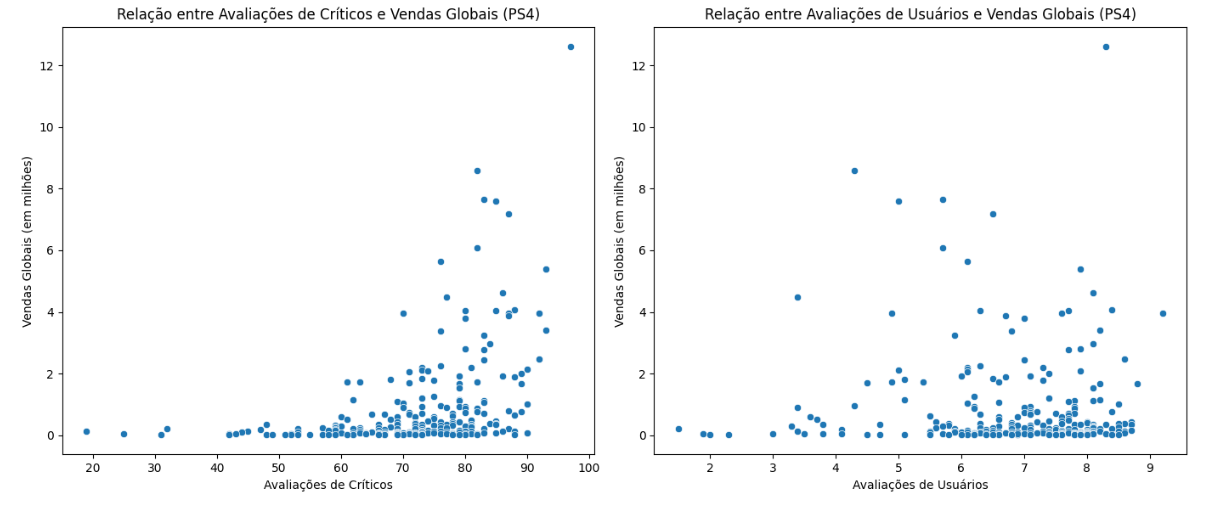   
 
</div>

In [104]:
genre_sale = df_project_6.groupby('genre')['total_sale'].sum()
genre_sale = genre_sale.sort_values(ascending=False)
print(genre_sale)

genre
Action          3750.08
Sports          2321.34
Shooter         2270.32
Racing          1091.33
Misc             829.06
Role-Playing     824.32
Platform         672.00
Fighting         538.68
Simulation       393.09
Adventure        137.38
Strategy         112.77
Puzzle            91.13
Name: total_sale, dtype: float64


In [106]:
platform_genre = df_project_6.groupby(['genre', 'platform'])['total_sale'].sum()
print(platform_genre)

genre     platform
Action    3DS          98.35
          DS          156.75
          GBA          79.80
          GC          161.80
          PC          549.26
                       ...  
Strategy  Wii           2.48
          WiiU          1.12
          X360         16.52
          XB            3.19
          XOne          2.14
Name: total_sale, Length: 197, dtype: float64


In [108]:
genres = ['Action', 'Sports', 'Shooter', 'Racing']
platforms_sale = ['PC', 'PS4', 'XOne', '3DS', 'WiiU']
filtered_genres = df_project_6[df_project_6['genre'].isin(genres)]
filtered_platforms = filtered_genres[filtered_genres['platform'].isin(platforms_sale)]
platform_genre = filtered_platforms.groupby(['genre', 'platform'])['total_sale'].sum()
print(platform_genre)

genre    platform
Action   3DS          98.35
         PC          549.26
         PS4         199.27
         WiiU        118.58
         XOne        153.89
Racing   3DS          16.14
         PC          109.47
         PS4          14.74
         WiiU          7.09
         XOne         19.30
Shooter  3DS           1.03
         PC          422.86
         PS4         152.45
         WiiU         62.72
         XOne        160.69
Sports   3DS           2.19
         PC          140.66
         PS4         133.72
         WiiU         14.50
         XOne        130.80
Name: total_sale, dtype: float64


In [109]:
#####Perfil de cada região

In [111]:
platforms_sale = ['PC', 'PS4', 'XOne', '3DS', 'WiiU']
filtered_platforms = df_project_6[df_project_6['platform'].isin(platforms_sale)]
sales_na = filtered_platforms.groupby('platform')['na_sales'].sum()
print(sales_na)

platform
3DS     48.67
PC      63.88
PS4     84.46
WiiU    30.69
XOne    76.03
Name: na_sales, dtype: float64


In [112]:
platforms_sale = ['PC', 'PS4', 'XOne', '3DS', 'WiiU']
filtered_platforms = df_project_6[df_project_6['platform'].isin(platforms_sale)]
sales_eu = filtered_platforms.groupby('platform')['eu_sales'].sum()
print(sales_eu)

platform
3DS      33.33
PC      107.62
PS4     112.44
WiiU     20.42
XOne     42.23
Name: eu_sales, dtype: float64


In [114]:
platforms_sale = ['PC', 'PS4', 'XOne', '3DS', 'WiiU']
filtered_platforms = df_project_6[df_project_6['platform'].isin(platforms_sale)]
sales_jp = filtered_platforms.groupby('platform')['jp_sales'].sum()
print(sales_jp)

platform
3DS     33.87
PC       0.17
PS4      9.43
WiiU    10.17
XOne     0.29
Name: jp_sales, dtype: float64


In [115]:
platform_genre_na = filtered_platforms.groupby(['genre', 'platform'])['na_sales'].sum()
print(platform_genre_na)

genre         platform
Action        3DS         13.99
              PC           7.62
              PS4         26.41
              WiiU         6.92
              XOne        16.52
Adventure     3DS          0.78
              PC           0.11
              PS4          0.97
              WiiU         0.03
              XOne         0.68
Fighting      3DS          1.13
              PC           0.01
              PS4          2.84
              WiiU         0.59
              XOne         1.56
Misc          3DS          1.79
              PC           1.69
              PS4          1.23
              WiiU         5.13
              XOne         2.72
Platform      3DS         11.37
              PC           0.05
              PS4          1.95
              WiiU         9.85
              XOne         0.29
Puzzle        3DS          0.73
              PC           0.03
              PS4          0.00
              WiiU         0.62
Racing        3DS          5.61
              PC 

In [116]:
platform_genre_eu = filtered_platforms.groupby(['genre', 'platform'])['eu_sales'].sum()
print(platform_genre_eu)

genre         platform
Action        3DS          8.41
              PC          15.36
              PS4         35.66
              WiiU         4.81
              XOne        10.11
Adventure     3DS          0.46
              PC           1.58
              PS4          1.55
              WiiU         0.05
              XOne         0.76
Fighting      3DS          0.84
              PC           0.11
              PS4          2.40
              WiiU         0.34
              XOne         0.48
Misc          3DS          1.21
              PC           1.19
              PS4          1.15
              WiiU         3.39
              XOne         0.99
Platform      3DS          8.41
              PC           0.33
              PS4          2.84
              WiiU         6.27
              XOne         0.28
Puzzle        3DS          1.02
              PC           0.13
              PS4          0.02
              WiiU         0.38
Racing        3DS          4.45
              PC 

In [117]:
platform_genre_jp = filtered_platforms.groupby(['genre', 'platform'])['jp_sales'].sum()
print(platform_genre_jp)

genre         platform
Action        3DS         6.60
              PC          0.00
              PS4         3.40
              WiiU        0.77
              XOne        0.05
Adventure     3DS         0.66
              PC          0.00
              PS4         0.14
              WiiU        0.00
              XOne        0.02
Fighting      3DS         0.46
              PC          0.00
              PS4         0.54
              WiiU        0.19
              XOne        0.00
Misc          3DS         1.22
              PC          0.00
              PS4         0.04
              WiiU        1.64
              XOne        0.01
Platform      3DS         5.94
              PC          0.00
              PS4         0.45
              WiiU        3.68
              XOne        0.00
Puzzle        3DS         0.75
              PC          0.00
              PS4         0.00
              WiiU        0.20
Racing        3DS         2.83
              PC          0.00
              PS

In [121]:
####Podemos observar uma relação entre a região, a plataforma e a quantidade de vendas. Com exceção da plataforma XOne, todas as outras plataformas têm suas maiores vendas concentradas nas mesmas regiões. Por exemplo, no caso da plataforma PC, as maiores vendas ocorrem predominantemente na região da União Europeia (EU). Já no caso da plataforma WiiU, as maiores vendas estão sempre na região da América do Norte (NA). Isso indica que há uma correlação entre a plataforma escolhida e as preferências de compra em diferentes regiões.

In [123]:
####Testando Hipoteses

In [125]:
#As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
#Hipótese Alternativa (H1): As classificações médias não são iguais


In [126]:
alpha = 0.05
rating_xone = df_project_6[df_project_6['platform'] == 'XOne']['user_score']
rating_pc = df_project_6[df_project_6['platform'] == 'PC']['user_score']
results = st.ttest_ind(rating_xone, rating_pc)

print('valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: 0.00010211482734739934
Rejeitamos a hipótese nula


In [127]:
#Hipótese Nula (H0): As classificações médias de usuários para os gêneros Action e Sports são diferentes
#Hipótese Alternativa (H1): As classificações médias não são diferentes

In [128]:
alpha = 0.05
rating_action = df_project_6[df_project_6['genre'] == 'Action']['user_score']
rating_sports = df_project_6[df_project_6['genre'] == 'Sports']['user_score']

print('valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: 0.00010211482734739934
Rejeitamos a hipótese nula


In [129]:
#Após analisar os dados, podemos concluir que existem várias relações entre os diferentes aspectos do mercado de jogos. Observamos que o ano de lançamento está relacionado à quantidade de jogos lançados, havendo um pico de lançamentos no início dos anos 2000. Além disso, a quantidade de vendas está diretamente ligada ao tipo de plataforma utilizada.
#Identificamos também que algumas plataformas deixaram de existir devido ao lançamento de novos modelos. Vale ressaltar que a maior quantidade de vendas não necessariamente indica a plataforma mais lucrativa, pois algumas estão em crescimento.
#As avaliações, tanto dos usuários quanto dos críticos, têm um impacto significativo nas vendas dos jogos. Há também gêneros que vendem mais do que outros, e dentro desses gêneros, uma plataforma específica apresenta um desempenho superior em termos de vendas.
#Por fim, constatamos que a região, a plataforma e a quantidade de vendas estão intrinsecamente relacionadas. Através de testes de hipótese, foi possível verificar que as classificações médias dos usuários e as plataformas indicadas não são iguais, assim como as classificações médias dos usuários e os gêneros indicados não são diferentes. Essas conclusões fornecem insights valiosos para entender o mercado de jogos e suas dinâmicas.